<ipython-input-4-a1aacb585249>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap="viridis")


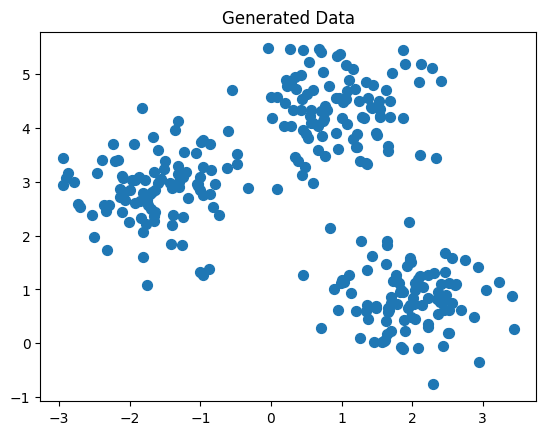

<ipython-input-4-a1aacb585249>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap="viridis")


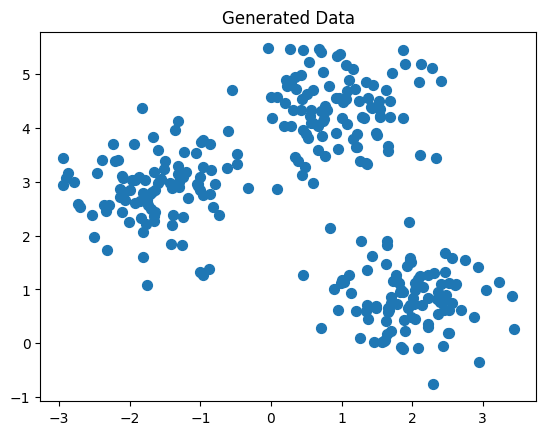

Centroids of the clusters:
[[ 1.95159369  0.83467497]
 [-1.60811992  2.85881658]
 [ 0.95625704  4.37226546]]


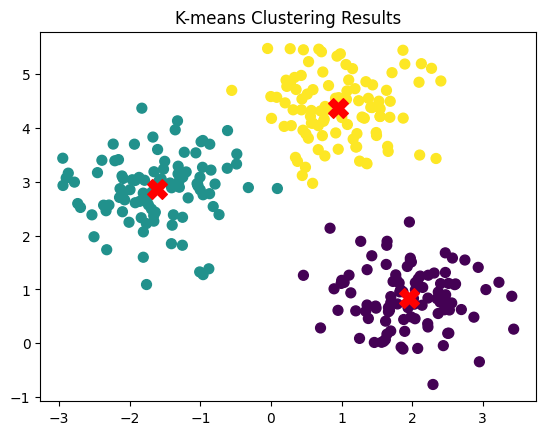

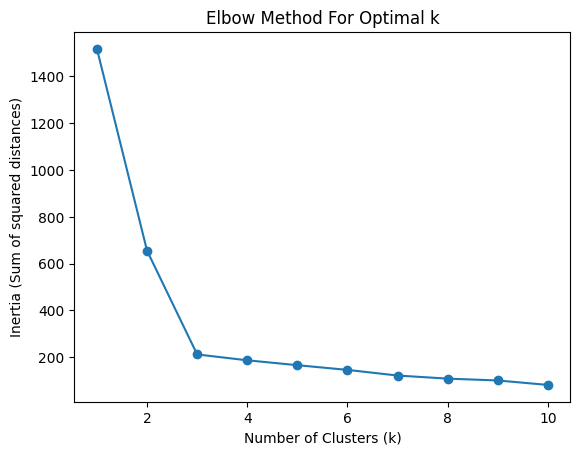

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap="viridis")
plt.title("Generated Data")
plt.show()
# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap="viridis")
plt.title("Generated Data")
plt.show()
# Initialize the KMeans object with the number of clusters k=3
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centroids and the cluster labels for each point
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids of the clusters:")
print(centroids)
# Plot the data points and color them by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker="X") # Centroids are marked with "X"

plt.title("K-means Clustering Results")
plt.show()
# Elbow Method to find the optimal number of clusters
inertia = [] # Store inertia values (sum of squared distances)
k_range = range(1, 11) # Try clustering with 1 to 10 clusters

for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.show()

Accuracy: 100.00%


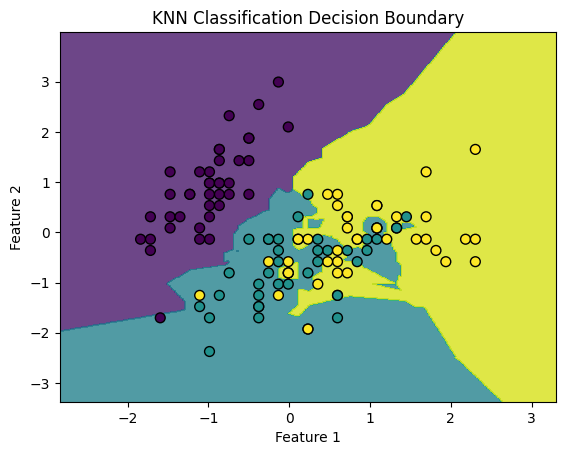

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Load the Iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target # Labels
# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a KNN classifier with k=3 (3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Use only the first two features for 2D visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train the model on the 2D data
knn.fit(X_train_2d, y_train)

# Plot decision boundary
h = .02 # Step size in the mesh

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# Predict the class labels for all points in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors="k", marker="o", s=50,
cmap="viridis")
plt.title("KNN Classification Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()